Program 1

In [9]:
import pandas as pd
import numpy as np

data = pd.read_csv('data.csv')
data
concepts = np.array(data)[:,:-1]
concepts
target = np.array(data)[:,-1]
target
def train(con, tar):
    for i, val in enumerate(tar):
        if val == 'yes':
            specific_h = con[i].copy()
            break
            
    for i, val in enumerate(con):
        if tar[i] == 'yes':
            for x in range(len(specific_h)):
                if val[x] != specific_h[x]:
                    specific_h[x] = '?'
                else:
                    pass
    return specific_h
print(train(concepts, target))


['sunny' 'warm' 'normal' 'strong' 'warm' 'same']


Program 2

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.DataFrame(data=pd.read_csv('enjoysport.csv'))
concepts = np.array(data.iloc[:, 0:-1])
print(concepts)
target = np.array(data.iloc[:, -1])
print(target)

[['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
 ['sunny' 'warm' 'high' 'strong' 'warm' 'same']
 ['rainy' 'cold' 'high' 'strong' 'warm' 'change']
 ['sunny' 'warm' 'high' 'strong' 'cold' 'change']]
['yes' 'yes' 'no' 'yes']


In [10]:
data

,sky,temp,humidity,wind,water,forest,o/p
0,sunny,warm,normal,strong,warm,same,yes


In [3]:
def learn(concepts, target):
    specific_h = concepts[0].copy()
    print("Initialization of specific_h and general_h")
    print(specific_h)
    general_h = [["?" for _ in range(len(specific_h))] for _ in range(len(specific_h))]
    print(general_h)
    
    for i, h in enumerate(concepts):
        if target[i] == "yes":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    specific_h[x] = '?'
                    general_h[x][x] = '?'
            print("Steps of Candidate Elimination Algorithm", i + 1)
            print(specific_h)
            print(general_h)
        
        if target[i] == "no":
            for x in range(len(specific_h)):
                if h[x] != specific_h[x]:
                    general_h[x][x] = specific_h[x]
                else:
                    general_h[x][x] = '?'
            print("Steps of Candidate Elimination Algorithm", i + 1)
            print(specific_h)
            print(general_h)
    
    indices = [i for i, val in enumerate(general_h) if val == ['?', '?', '?', '?', '?', '?']]
    for i in indices:
        general_h.remove(['?', '?', '?', '?', '?', '?'])
    
    return specific_h, general_h

s_final, g_final = learn(concepts, target)
print("Final Specific_h:", s_final, sep="\n")
print("Final General_h:", g_final, sep="\n")

Initialization of specific_h and general_h
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Steps of Candidate Elimination Algorithm 1
['sunny' 'warm' 'normal' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Steps of Candidate Elimination Algorithm 2
['sunny' 'warm' '?' 'strong' 'warm' 'same']
[['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?'], ['?', '?', '?', '?', '?', '?']]
Steps of Candidate Elimination Algorithm 3
['sunny' 'warm' '?' 'strong' 'warm' 'same']
[['sunny', '?', '?', '?', '?', '?'], ['?', 'warm', '?', '?', '?

Program 3

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [5]:
data = load_iris()
X = data.data  # Features
y = data.target

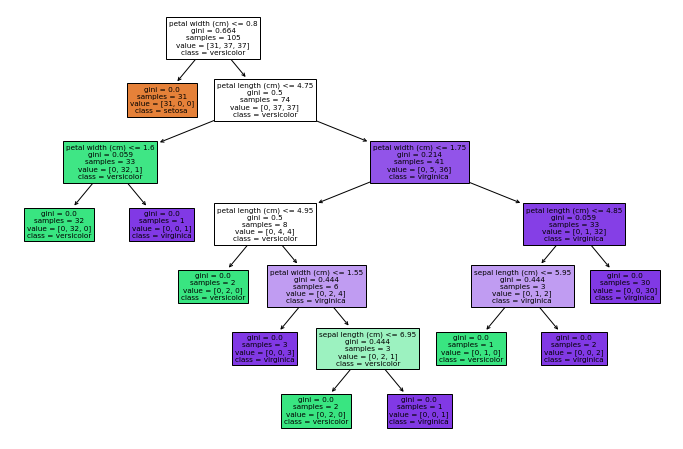

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Initialize the Decision Tree model
clf = DecisionTreeClassifier()

# Step 5: Train the model
clf.fit(X_train, y_train)

# Step 6: Visualize the decision tree (optional)
plt.figure(figsize=(12,8))
tree.plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

In [7]:
score = clf.score(X_test, y_test)
print(f"Model accuracy: {score:.2f}")

Model accuracy: 1.00


In [11]:

import numpy as np

# Activation function: Sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Forward propagation
def feedforward(X, weights1, bias1, weights2, bias2):
    hidden_input = np.dot(X, weights1) + bias1
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights2) + bias2
    final_output = sigmoid(final_input)
    return hidden_output, final_output

# Backpropagation
def backpropagation(X, y, weights1, bias1, weights2, bias2, hidden_output, final_output, learning_rate):
    # Calculate the error
    error = y - final_output
    d_final_output = error * sigmoid_derivative(final_output)

    # Backpropagate the error
    error_hidden_layer = d_final_output.dot(weights2.T)
    d_hidden_output = error_hidden_layer * sigmoid_derivative(hidden_output)

    # Update the weights and biases
    weights2 += hidden_output.T.dot(d_final_output) * learning_rate
    bias2 += np.sum(d_final_output, axis=0, keepdims=True) * learning_rate
    weights1 += X.T.dot(d_hidden_output) * learning_rate
    bias1 += np.sum(d_hidden_output, axis=0, keepdims=True) * learning_rate

    return weights1, bias1, weights2, bias2

# Training the network
def train(X, y, weights1, bias1, weights2, bias2, learning_rate, epochs):
    for epoch in range(epochs):
        hidden_output, final_output = feedforward(X, weights1, bias1, weights2, bias2)
        weights1, bias1, weights2, bias2 = backpropagation(X, y, weights1, bias1, weights2, bias2, hidden_output, final_output, learning_rate)
        if epoch % 1000 == 0:
            loss = np.mean((y - final_output) ** 2)
            print(f'Epoch {epoch}, Loss: {loss}')
    return weights1, bias1, weights2, bias2

# Example usage
if __name__ == "__main__":
    # Input data (XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Initialize weights and biases
    np.random.seed(42)
    input_layer_neurons = 2
    hidden_layer_neurons = 2
    output_layer_neurons = 1

    weights1 = np.random.uniform(size=(input_layer_neurons, hidden_layer_neurons))
    bias1 = np.random.uniform(size=(1, hidden_layer_neurons))
    weights2 = np.random.uniform(size=(hidden_layer_neurons, output_layer_neurons))
    bias2 = np.random.uniform(size=(1, output_layer_neurons))

    # Training parameters
    learning_rate = 0.2
    epochs = 100000

    # Train the network
    weights1, bias1, weights2, bias2 = train(X, y, weights1, bias1, weights2, bias2, learning_rate, epochs)

    # Test the network
    _, final_output = feedforward(X, weights1, bias1, weights2, bias2)
    print("Predicted Output:")
    print(final_output)
    print("Actual Output:")
    print(y)

Epoch 0, Loss: 0.3246585814644244
Epoch 1000, Loss: 0.19610214801867648
Epoch 2000, Loss: 0.030506238866855884
Epoch 3000, Loss: 0.0073706958972687255
Epoch 4000, Loss: 0.0038472606418112404
Epoch 5000, Loss: 0.0025457917159948523
Epoch 6000, Loss: 0.0018843385580302476
Epoch 7000, Loss: 0.0014881898330620813
Epoch 8000, Loss: 0.0012259217453827035
Epoch 9000, Loss: 0.001040147640088948
Epoch 10000, Loss: 0.0009019959752346655
Epoch 11000, Loss: 0.0007954188974947805
Epoch 12000, Loss: 0.0007108098367491761
Epoch 13000, Loss: 0.0006420783036253183
Epoch 14000, Loss: 0.0005851820122502724
Epoch 15000, Loss: 0.0005373358119800938
Epoch 16000, Loss: 0.0004965600232780098
Epoch 17000, Loss: 0.00046140994811386024
Epoch 18000, Loss: 0.0004308072428895202
Epoch 19000, Loss: 0.0004039311285465358
Epoch 20000, Loss: 0.00038014609593079807
Epoch 21000, Loss: 0.0003589526062384123
Epoch 22000, Loss: 0.0003399526989366922
Epoch 23000, Loss: 0.0003228255101665537
Epoch 24000, Loss: 0.0003073095286